ĐỒ ÁN CUỐI KỲ LẬP TRÌNH SONG SONG

Nguyễn Đình Hữu 1612859

Bùi Trọng Xuyến 1612835

In [8]:
# Đoạn code Python để hiển thị file ảnh pnm ở notebook
# Ví dụ để hiển thị file "img.pnm", ở dòng cuối của code cell
# bạn gõ (không cần dấu ! đằng trước): show_pnm('img.pnm')
# LƯU Ý: bạn phải chạy cell này một lần thì mới gọi được hàm show_pnm
from PIL import Image
import numpy as np
def show_pnm(file_name):
  with open(file_name, 'r') as f:
    vals = f.read().split()
  w = int(vals[1])
  h = int(vals[2])
  if vals[0] == 'P2': # Grayscale
    pixels = np.array(vals[4:], dtype=np.uint8).reshape((h, w))
  elif vals[0] == 'P3': # RGB
    pixels = np.array(vals[4:], dtype=np.uint8).reshape((h, w, 3))
  else:
    return None
  
  return Image.fromarray(pixels)

# Đoạn code Python để hiển thị file chứa ma trận ở notebook
# (một dòng của ma trận ứng với một dòng trong file, 
# các phần tử trên mỗi dòng được cách nhau bởi khoảng trắng) 
# Ví dụ để hiển thị file "pixel_importance.txt", ở dòng cuối của code cell
# bạn gõ: show_matrix('pixel_important.txt')
def show_matrix(matrix_file):
  m = np.loadtxt(matrix_file)
  m = m + m.min()
  m = m / m.max()
  m = m * 255
  m = m.astype(np.uint8)
  return Image.fromarray(m)

In [11]:
!nvcc toGrayParallel.cu -o toGray



In [12]:
!./toGray "in.pnm" "gray.pnm"


Image size (width x height): 640 x 434

GPU name: Tesla T4
GPU compute capability: 7.5

Grid size: 14 x 20
Block size: 32 x 32
Processing time 1.059168 ms use device

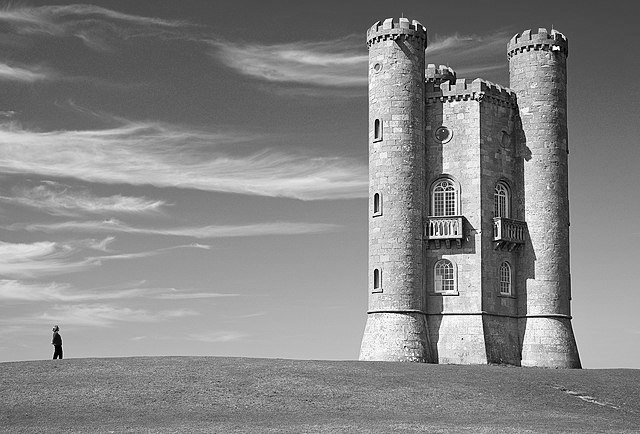

In [13]:
show_pnm("gray.pnm")


In [ ]:
!nvcc edgeDetectionParallel.cu -o edgeDetection


In [22]:
!./edgeDetection "gray.pnm" "edge.pnm"

Image size (width x height): 640 x 434

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time 0.815680 ms use device

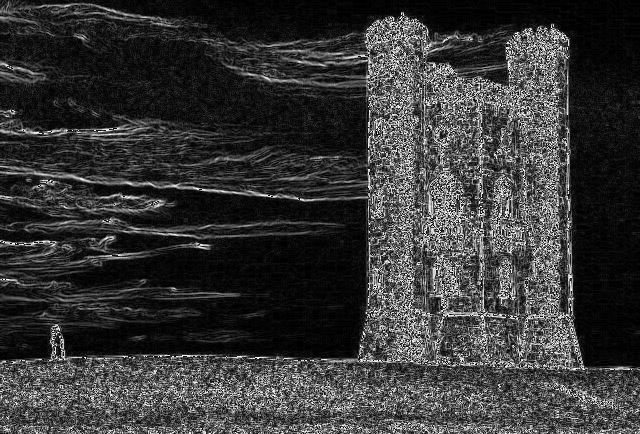

In [23]:
show_pnm("edge.pnm")

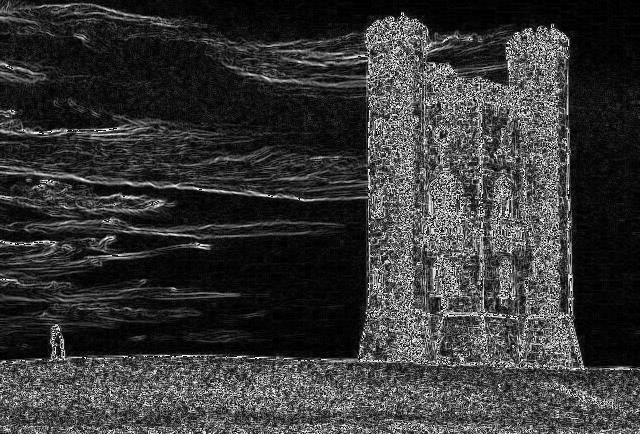

In [32]:
show_matrix("edge.txt")

In [34]:
!nvcc seamCarvingSequence.cu -o seam 

In [36]:
!./seam in.pnm out.pnm 100


Image size (width x height): 640 x 434

Processing time (use host): 40.795812 s



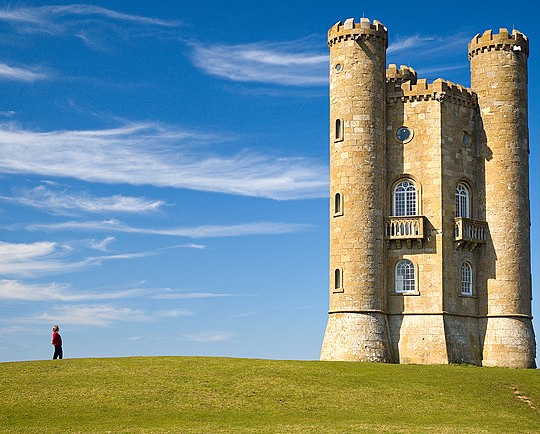

In [38]:
show_pnm("out_host.pnm")

In [28]:
!nvcc findSeamParallel.cu -o findSeam


In [29]:
!./findSeam edge.pnm in.pnm firstSeam.pnm

Image size (width x height): 640 x 434

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time 6.380256 ms use device
232 20


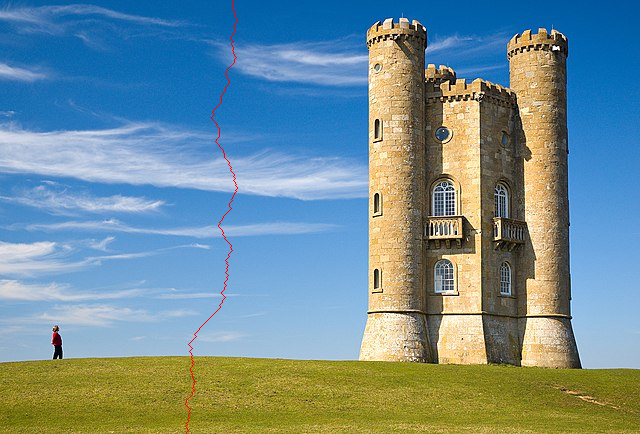

In [30]:
show_pnm("firstSeam.pnm")

In [192]:
!nvcc SeamCarvingV0.cu -o seam

In [193]:
!./seam in.pnm cut_first_seam.pnm 1

GPU name: Tesla T4
GPU compute capability: 7.5

RGB Image size (width x height): 640 x 434

Processing time (use device): 143.730118 ms



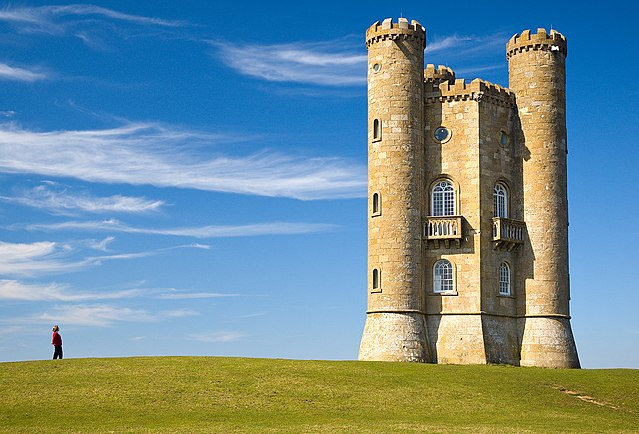

In [194]:
show_pnm("cut_first_seam.pnm")

In [195]:
!nvcc SeamCarvingV1.cu -o seam

GPU name: Tesla T4
GPU compute capability: 7.5

RGB Image size (width x height): 640 x 434

232 20


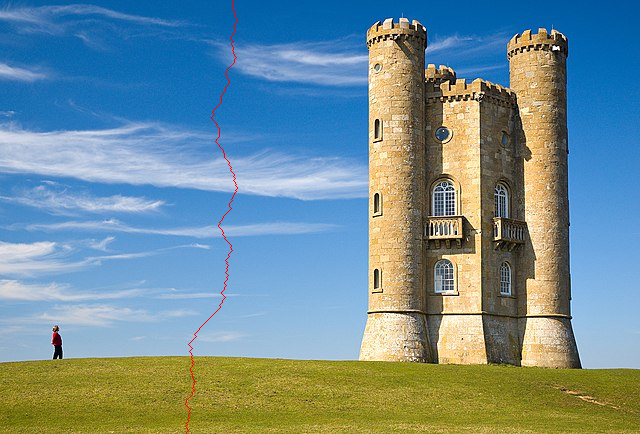

In [196]:
!./seam in.pnm out.pnm 1 checkSeam.pnm
show_pnm("checkSeam.pnm")

GPU name: Tesla T4
GPU compute capability: 7.5

RGB Image size (width x height): 635 x 434

76 52


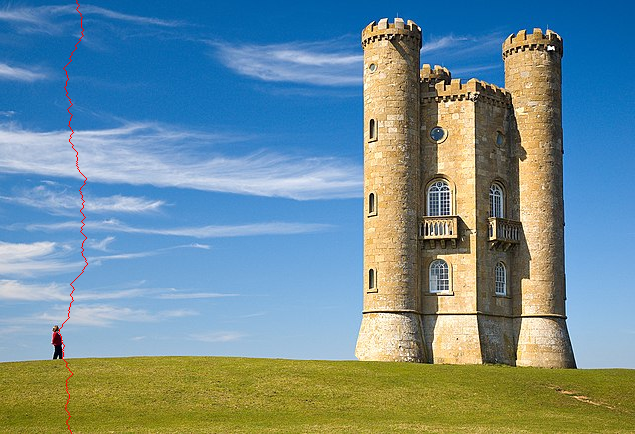

In [201]:
!./seam out.pnm out.pnm 1 "checkSeam.pnm"
show_pnm("checkSeam.pnm")